MD. Tanvir Jawad <br>
ID: 21101221

```
# This is formatted as code
```



In [1]:
try:
    import pint
except ImportError:
    !pip install pint

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.0/294.0 kB 5.6 MB/s eta 0:00:00


In [2]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [4]:
# import functions from modsim

from modsim import *

In [6]:
bikeshare = State(olin=10, wellesley=2)
bikeshare.olin
show(bikeshare)

,state
olin,10
wellesley,2


In [7]:
bikeshare.olin = 9
bikeshare.wellesley = 3

In [10]:
def bike_to_wellesley():
    bikeshare.olin -= 1
    bikeshare.wellesley += 1

In [27]:
def bike_to_olin():
    print('Moving a bike to Olin')
    bikeshare.wellesley -= 1
    bikeshare.olin += 1

In [11]:
bike_to_wellesley()
show(bikeshare)


,state
olin,7
wellesley,5


In [12]:
print(bikeshare.olin)
print(bikeshare.wellesley)

7
5


In [13]:
np.random.seed(17)

In [25]:
def step():
    if flip(0.5):
        bike_to_wellesley()

    if flip(0.33):
        bike_to_olin()
step()

In [ ]:
def step(p1, p2):
    if flip(p1):
        bike_to_wellesley()

    if flip(p2):
        bike_to_olin()
step(0.5, 0.33)

In [30]:
for i in range(3):
    print(i)
    bike_to_wellesley()

0
1
2


In [31]:
bikeshare = State(olin=10, wellesley=2)
results = TimeSeries()
results[0] = bikeshare.olin

for i in range(3):
    print(i)
    step(0.6, 0.6)
    results[i+1] = bikeshare.olin

show(results)

0
1
2
Moving a bike to Olin


,Quantity
Time,
0,10
1,10
2,9
3,9


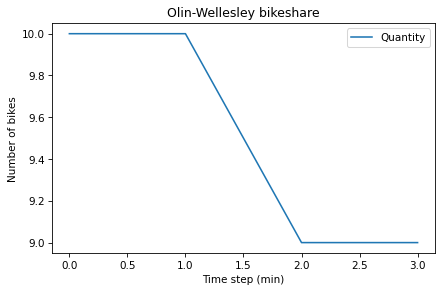

In [32]:
results.plot()

decorate(title='Olin-Wellesley bikeshare',
         xlabel='Time step (min)',
         ylabel='Number of bikes')

In [33]:
bikeshare = State(olin=10, wellesley=2)

bikeshare.wellesley

2

<Axes: xlabel='Time'>

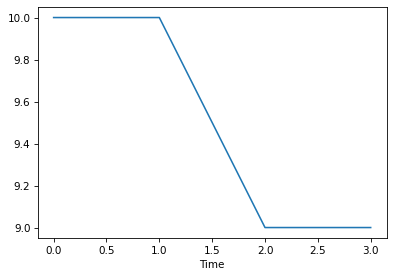

In [36]:
def run_simulation(p1, p2, num_steps):
    results = TimeSeries()
    results[0] = bikeshare.olin
    for i in range(num_steps):
        step(p1,p2)
        results[i+1] = bikeshare.olin
    results.plot()
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)',
             ylabel='Number of bikes')
results.plot()

Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin
Moving a bike to Olin


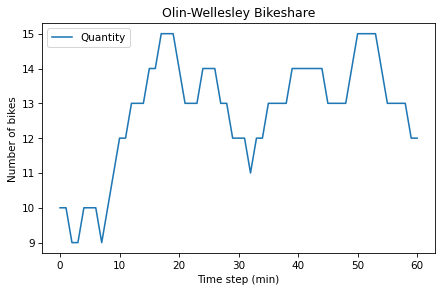

In [37]:
bikeshare = State(olin=10, wellesley=2)
run_simulation(0.3, 0.2, 60)